# Programming Assignment-2 : ML for Smart Monkeys

Submitted by : SRINITHI S (213010036)
               VAISHNAVI J (213010037)

In [87]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Reading the data


In [88]:
# Displaying the header of the train data
train_Df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv')
train_Df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


In [89]:
# Displaying the header of the test data
test_Df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv')
test_Df.head()


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S


In [90]:
# Analysing the size of the data 
print(train_Df.shape)
print(test_Df.shape)

(762, 79)
(225, 79)


# Exploratory data analysis

In [91]:
# Description of the train dataset
train_Df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,582.000000,567.000000,762.000000,702.000000,762.000000,612.000000,582.000000,582.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311905,3.882665,0.232722,0.182514,3.513055,0.212083,1.447201,...,0.226365,0.156693,0.136973,0.122095,0.129689,0.450260,0.166017,0.182322,0.206105,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,...,0.029564,0.030299,0.029633,0.014928,0.022832,0.062304,0.059256,0.041938,0.058118,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,...,0.162642,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213118,...,0.205750,0.136188,0.116234,0.110655,0.111676,0.407385,0.124382,0.152365,0.164155,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.800418,0.229032,0.181405,3.319506,0.210077,1.347557,...,0.224439,0.150386,0.131542,0.122600,0.126138,0.450500,0.153342,0.174184,0.191754,1.351277
75%,0.486749,0.700621,0.346747,2.534053,4.471656,0.255064,0.197664,4.493452,0.233947,1.542629,...,0.241714,0.170685,0.150942,0.133617,0.142831,0.488438,0.195401,0.205146,0.235925,1.616752
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.434624,0.317066,6.947290,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.210908,0.759588,0.479763,0.360692,0.413903,2.129791


Observations:
  1. Each column has different range, max, min and mean.


In [92]:
# Printing the datatypes of each columns of the dataset
print(train_Df.dtypes)
print(test_Df.dtypes)

DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object
DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object


Observations:
1. All the columns of proteins are of float datatypes.
2. The two output classes are of object datatypes.

In [93]:
# Printing the number of unique vales and null values in each column of the train dataset
for c in train_Df.columns.values:
  val_len = len(pd.unique(train_Df[c]))
  print(c + ' has ' + str(val_len) + ' unique values and is of type ' + str(train_Df[c].dtypes) + ' and has ' + str(train_Df[c].isnull().sum()) + ' null values')


DYRK1A_N has 762 unique values and is of type float64 and has 0 null values
ITSN1_N has 761 unique values and is of type float64 and has 0 null values
BDNF_N has 762 unique values and is of type float64 and has 0 null values
NR1_N has 762 unique values and is of type float64 and has 0 null values
NR2A_N has 762 unique values and is of type float64 and has 0 null values
pAKT_N has 762 unique values and is of type float64 and has 0 null values
pBRAF_N has 760 unique values and is of type float64 and has 0 null values
pCAMKII_N has 762 unique values and is of type float64 and has 0 null values
pCREB_N has 762 unique values and is of type float64 and has 0 null values
pELK_N has 762 unique values and is of type float64 and has 0 null values
pERK_N has 762 unique values and is of type float64 and has 0 null values
pJNK_N has 761 unique values and is of type float64 and has 0 null values
PKCA_N has 762 unique values and is of type float64 and has 0 null values
pMEK_N has 762 unique values an

## Histogram

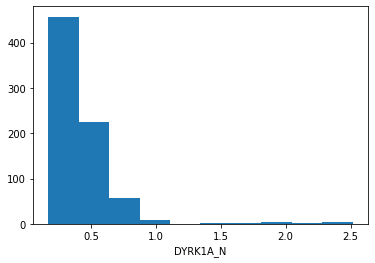

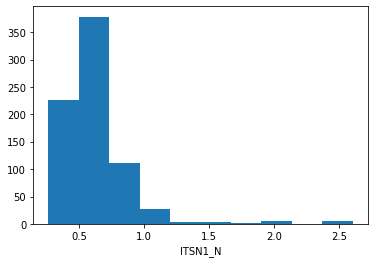

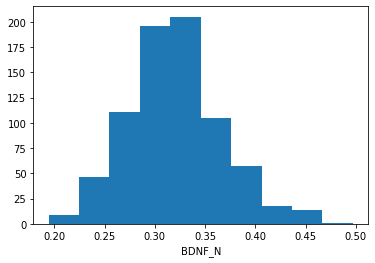

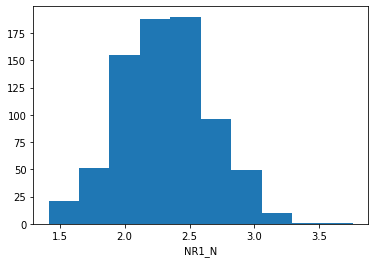

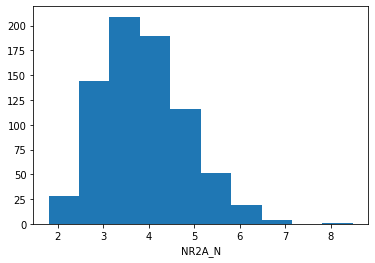

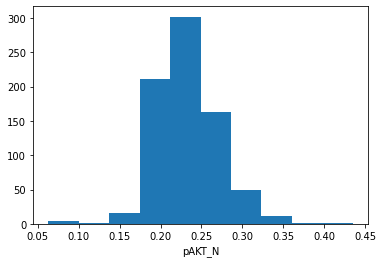

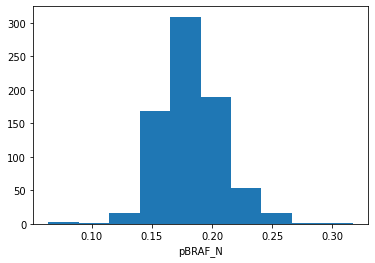

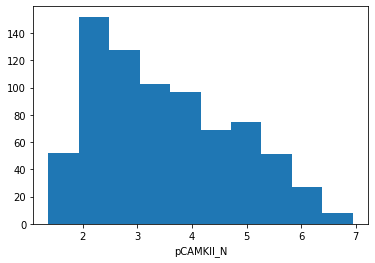

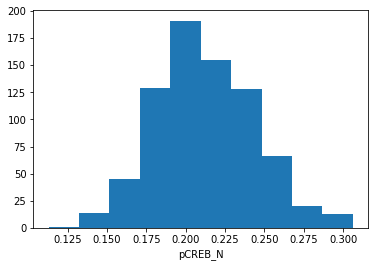

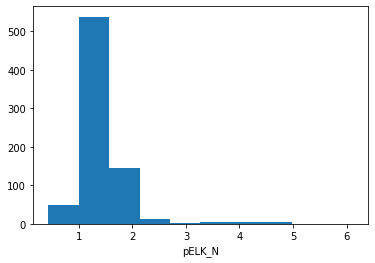

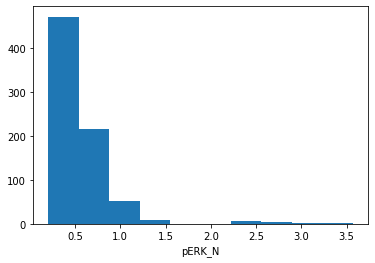

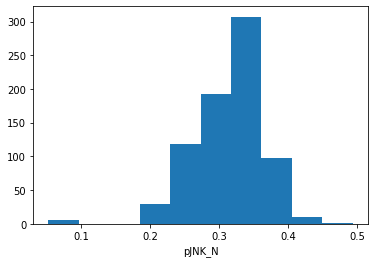

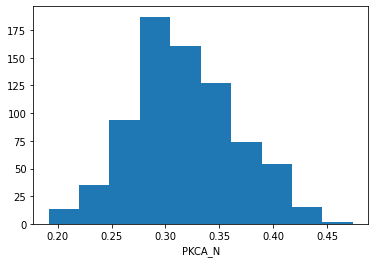

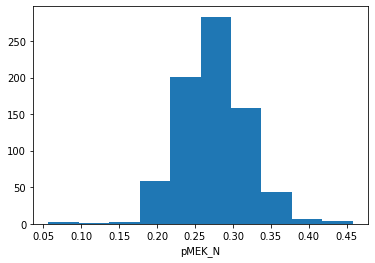

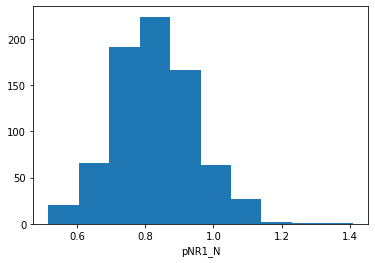

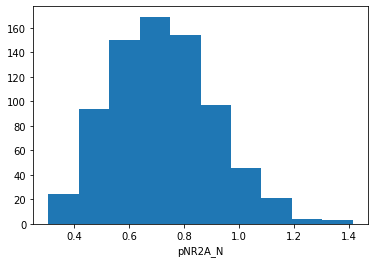

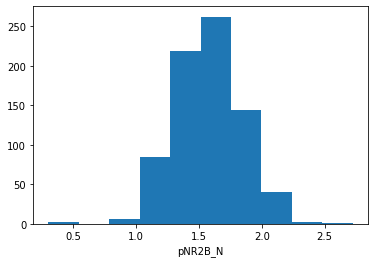

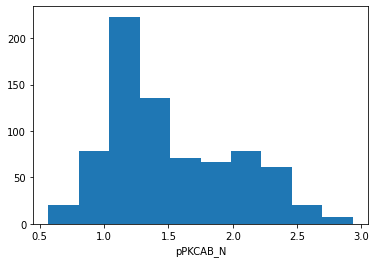

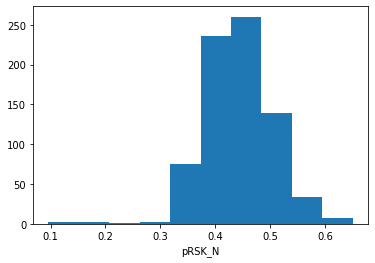

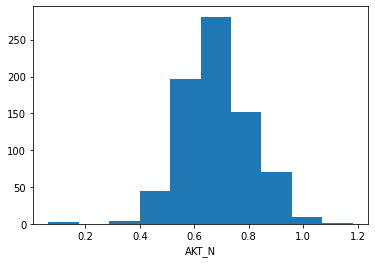

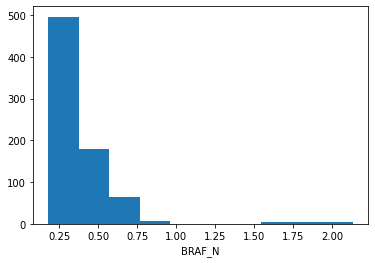

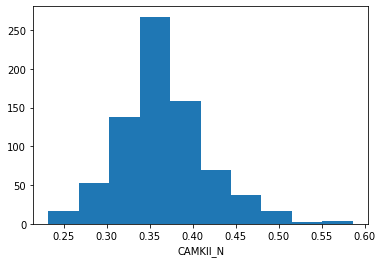

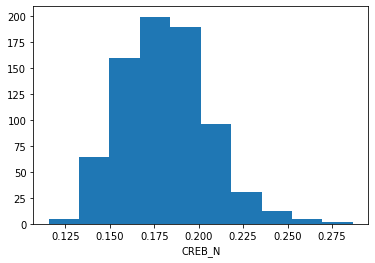

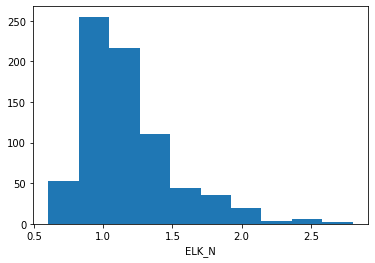

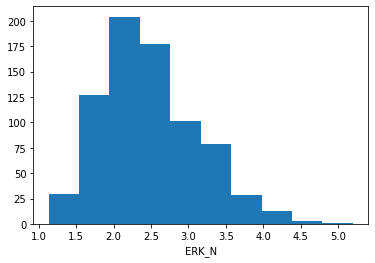

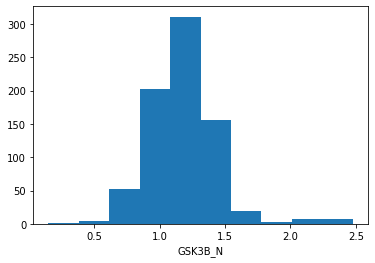

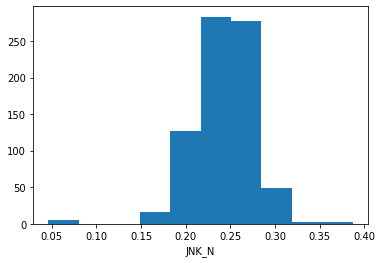

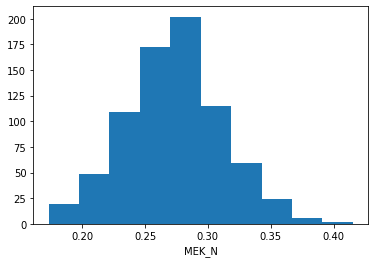

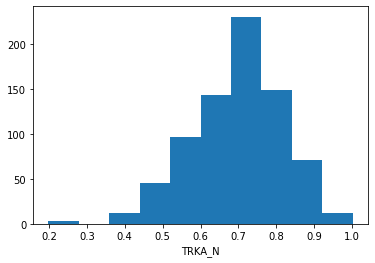

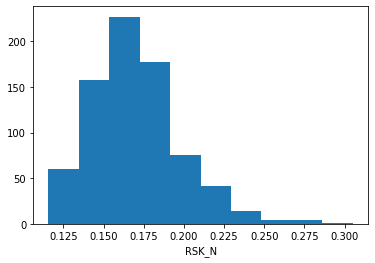

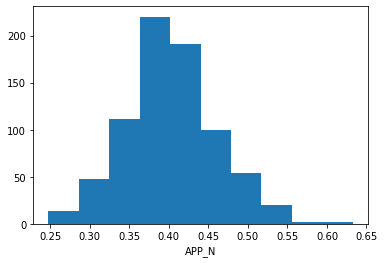

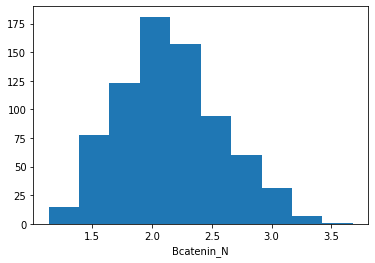

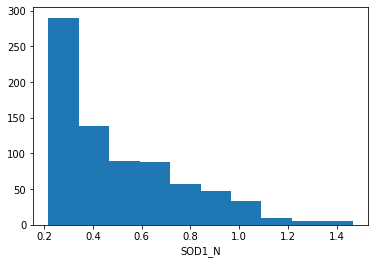

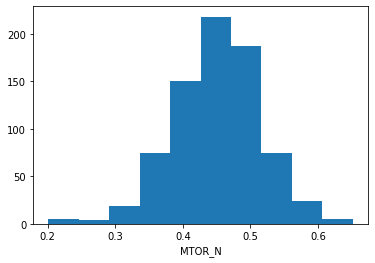

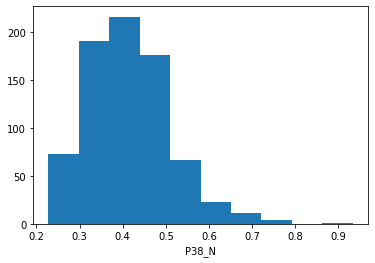

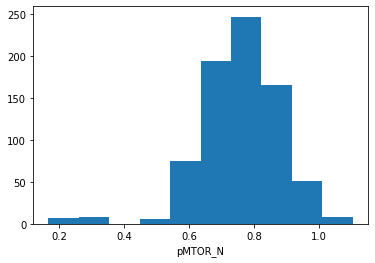

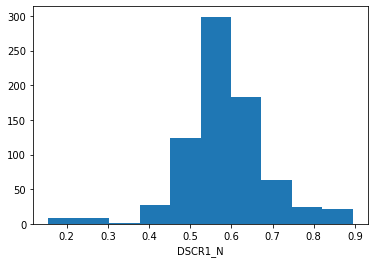

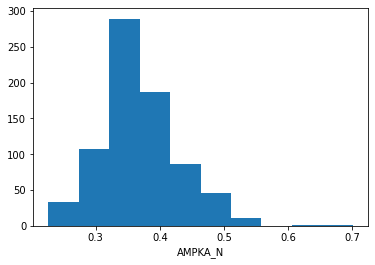

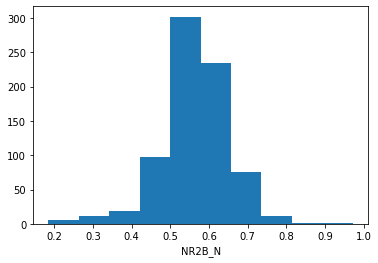

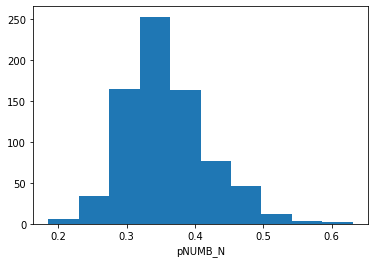

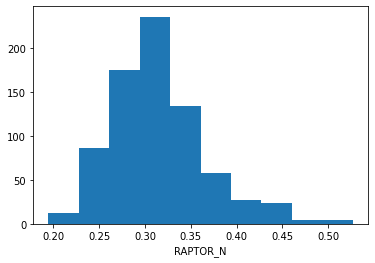

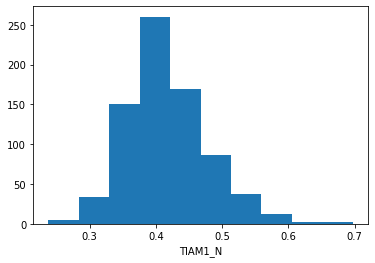

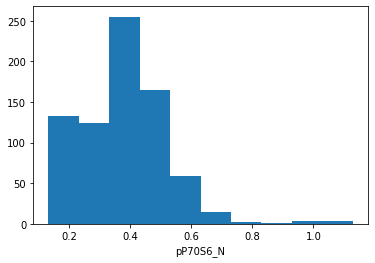

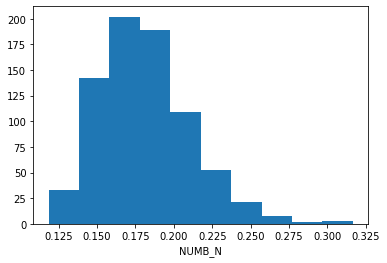

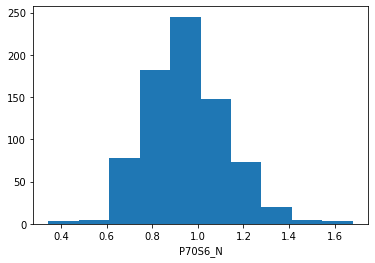

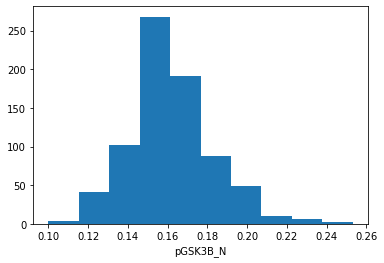

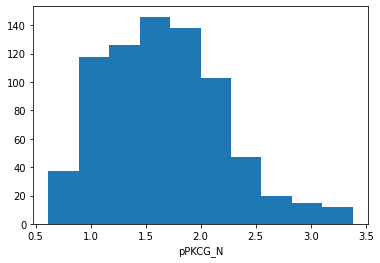

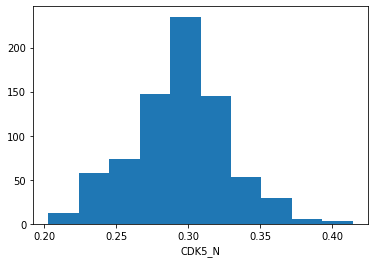

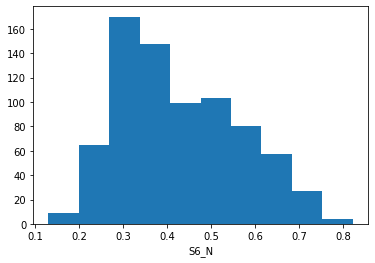

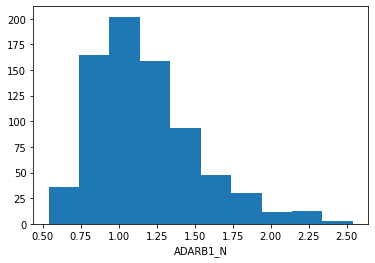

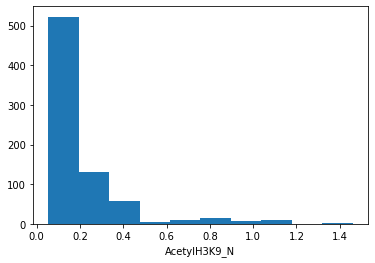

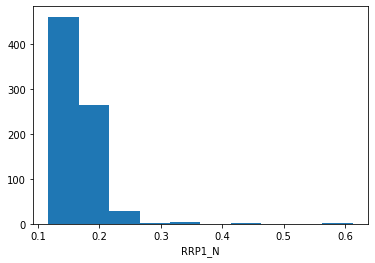

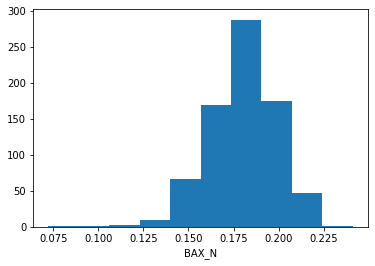

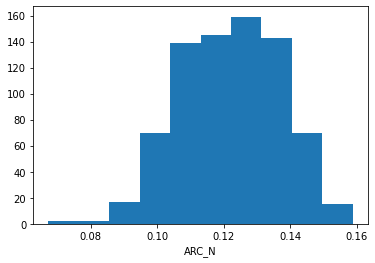

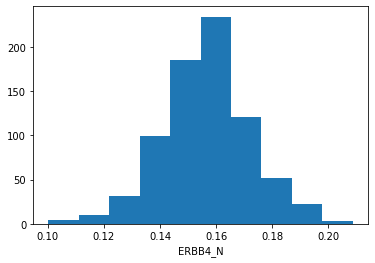

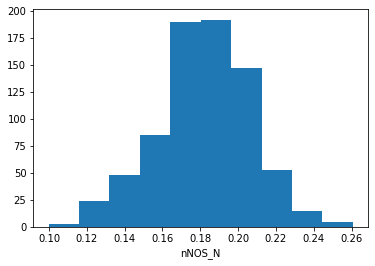

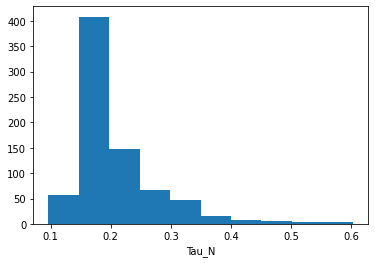

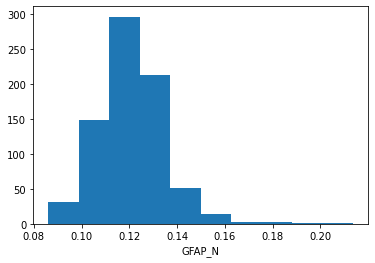

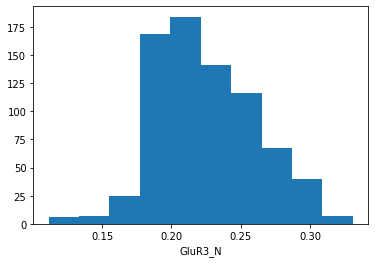

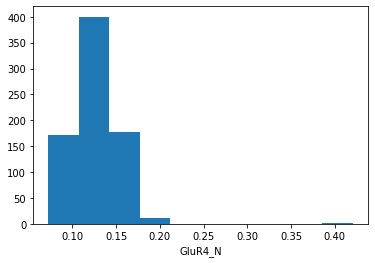

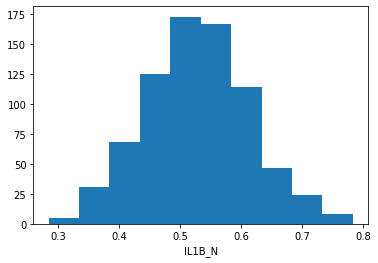

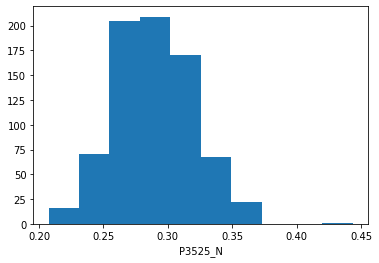

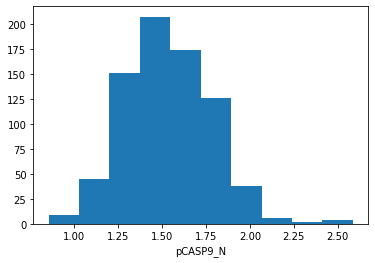

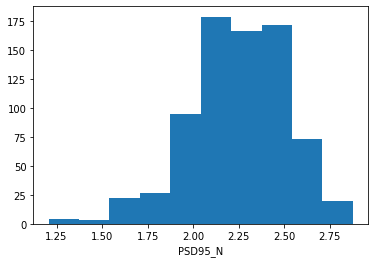

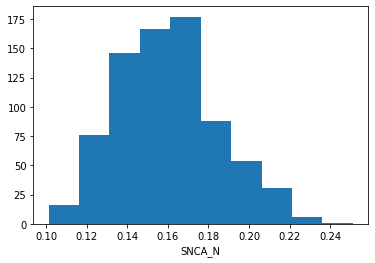

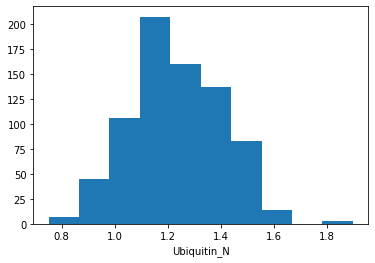

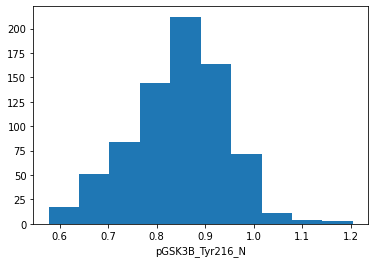

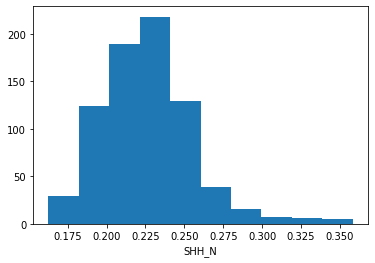

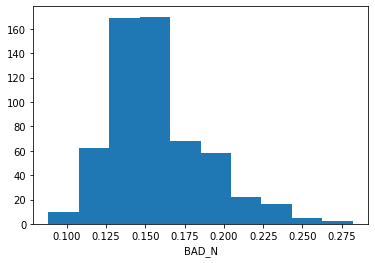

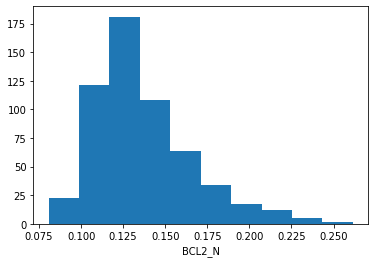

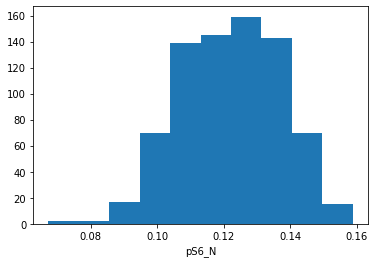

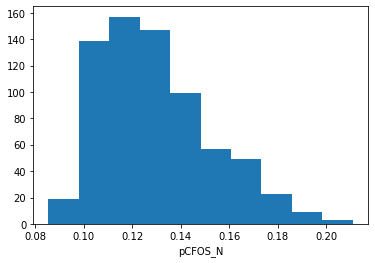

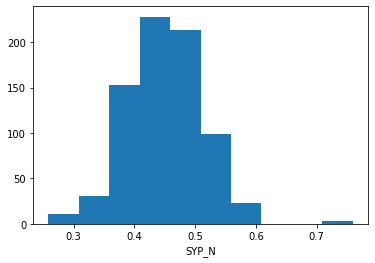

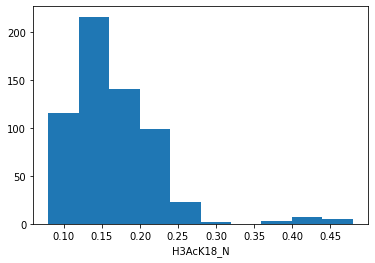

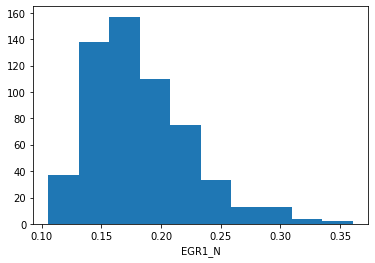

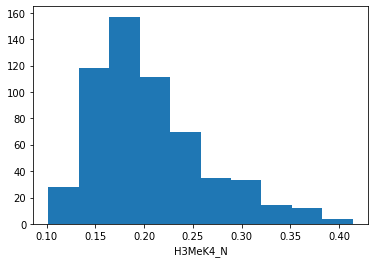

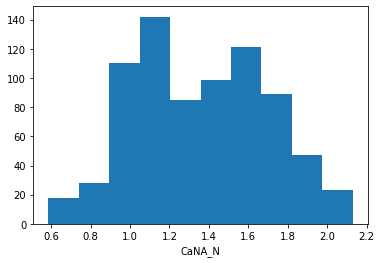

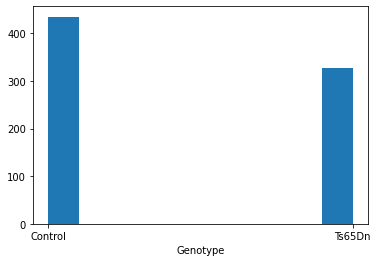

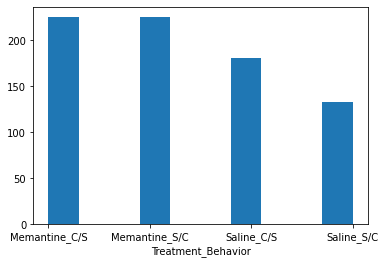

In [94]:
# ploting histograms
for c in train_Df.columns.values:
  if (train_Df[c].dtypes == 'float64') or (train_Df[c].dtypes == 'object'):
    plt.hist(train_Df[c])
    plt.xlabel(c)
    plt.show() 


**OBSERVATION** 

Looking and analysing all the histograms we can see that majority of the variables are spread well except PELK_N, BRAF_N, AcetylH3K9_N.

Eventhough these three variables are highly skewed, few samples have some spread and might influence the output. Hence we will not omit any of the features. 

## Count plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


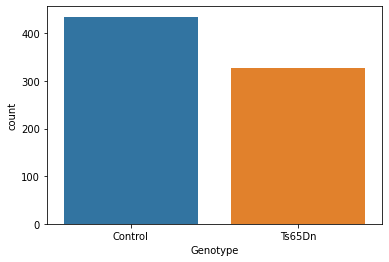

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


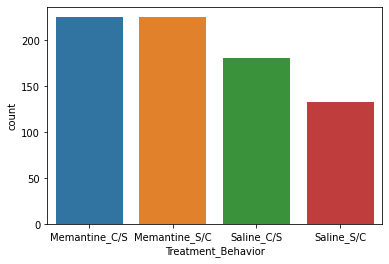

In [95]:
# Count plots for analysing the balance of classes
# 1.For the binary class (Genotype)
g = sns.countplot(train_Df['Genotype'])
plt.show()

# 2. For the four-class (Treatment Behaviour)
g=sns.countplot(train_Df['Treatment_Behavior'])
plt.show()

Observations:

From the count plots, it can be observed that the classes are balanced for both Genotype and Treatment Behaviour.

## Correlation matrix

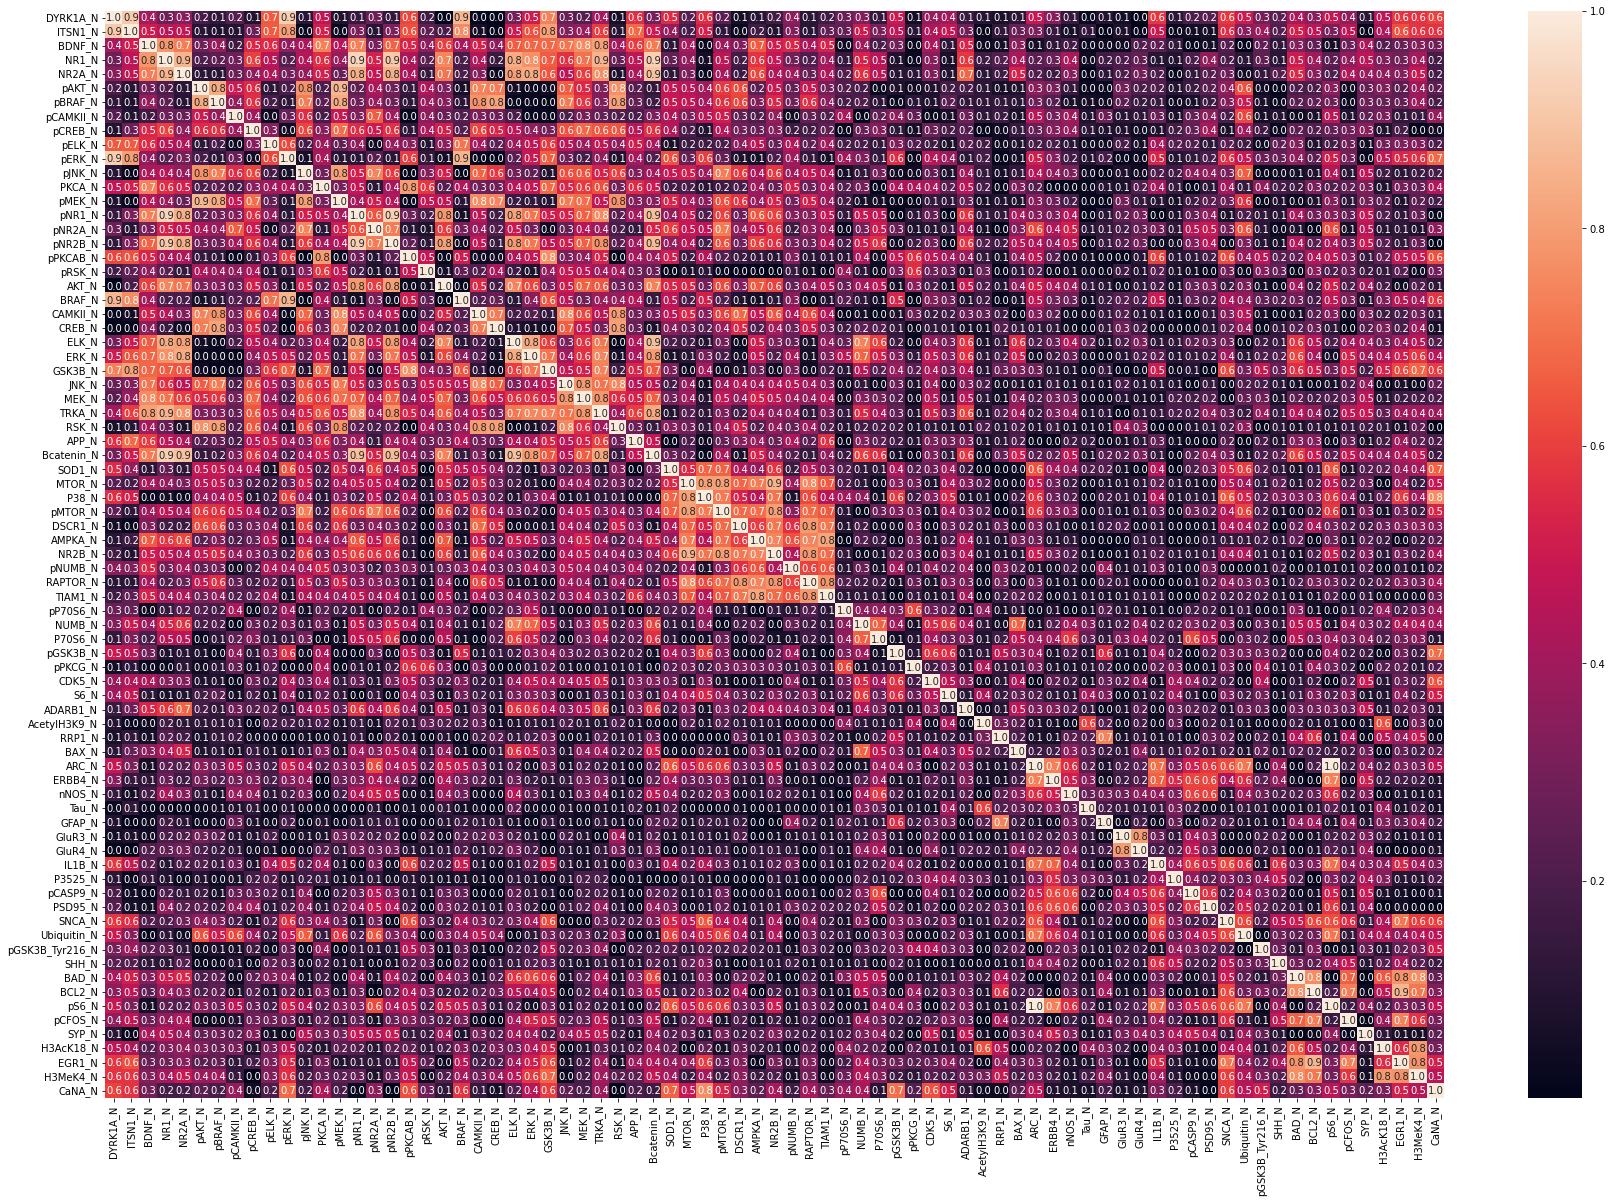

In [96]:
# Creating a heat map or correlation matrix for the train dataset
corrmatrix =train_Df.corr(method='spearman')
fig, ax=plt.subplots(figsize=(30,20))
sns.heatmap(abs(corrmatrix),annot=True,fmt='.1f')
plt.show()

# Data Cleaning

In [97]:
# Select upper triangle of correlation matrix
upper = corrmatrix.where(np.triu(np.ones(corrmatrix.shape), k=1).astype(np.bool))

# Find features with correlation threshold greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
train_Df.drop(to_drop, axis=1, inplace=True)
test_Df.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


### Observations:

The number of features has been reduced from 79 to 57.


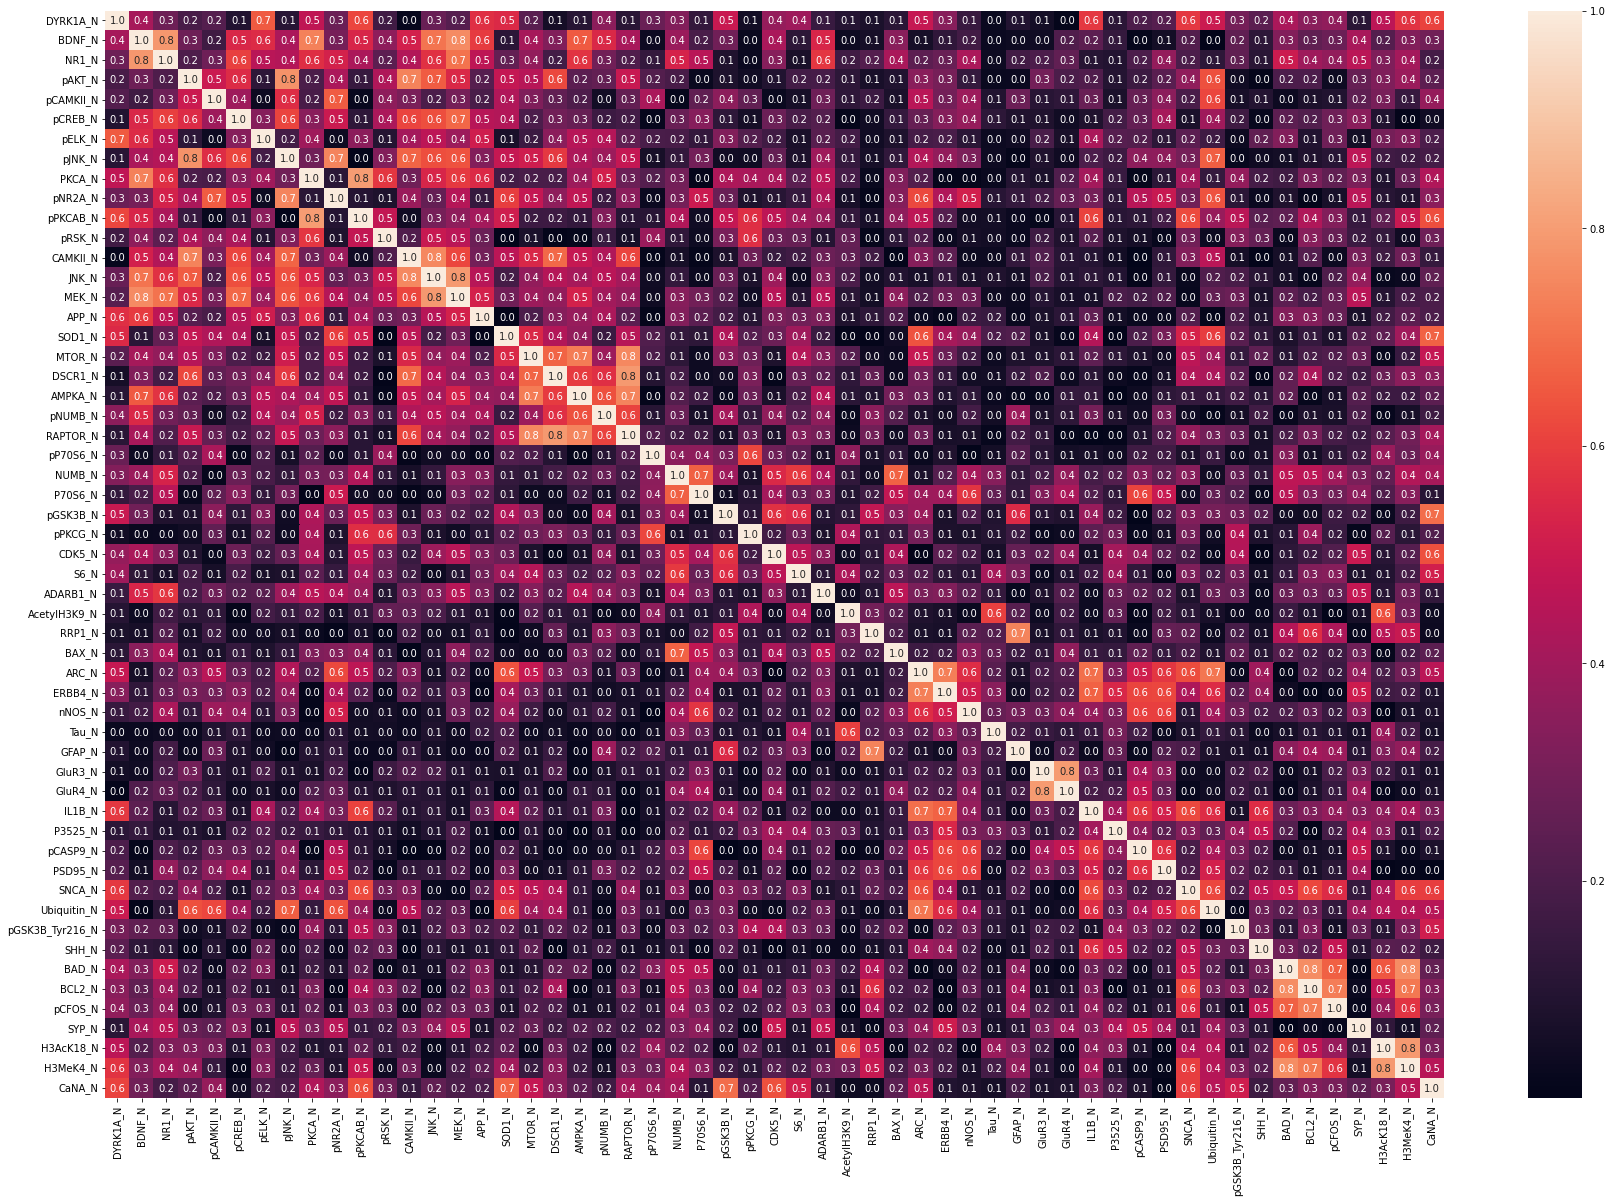

In [98]:
# Correlation matrix for reduced dataset
# The correlation matrix is again plotted for the reduced/ cleaned dataset
corrmatrix =train_Df.corr(method='spearman')
fig, ax=plt.subplots(figsize=(30,20))
sns.heatmap(abs(corrmatrix),annot=True,fmt='.1f')
plt.show()

# Iterative Imputer

Multi-variate imputation has been carried out to fill the Nan or null values present in the train and test data.

In [99]:
# For train data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.DataFrame(train_Df.iloc[:,0:-2])   # Excluding the columns containing the classes

# Setting the random_state argument for reproducibility

imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df_imputed_train = pd.DataFrame(imputed, columns=df.columns)

df_imputed_train.head()

,DYRK1A_N,BDNF_N,NR1_N,pAKT_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,PKCA_N,pNR2A_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,H3MeK4_N,CaNA_N
0,0.503644,0.430175,2.816329,0.218830,2.373744,0.232224,1.750936,0.306382,0.402698,0.605673,...,1.044979,0.831557,0.188852,0.122652,0.104509,0.108336,0.427099,0.114783,0.128186,1.675652
1,0.514617,0.411770,2.789514,0.211636,2.292150,0.226972,1.596377,0.299051,0.385987,0.587559,...,1.009883,0.849270,0.200404,0.116682,0.104641,0.104315,0.441581,0.111974,0.131119,1.743610
2,0.509183,0.418309,2.687201,0.209011,2.283337,0.230247,1.561316,0.291276,0.381002,0.602449,...,0.996848,0.846709,0.193685,0.118508,0.103162,0.106219,0.435777,0.111883,0.127431,1.926427
3,0.442107,0.358626,2.466947,0.222886,2.152301,0.207004,1.595086,0.296729,0.377087,0.520293,...,0.990225,0.833277,0.192112,0.132781,0.113642,0.111262,0.391691,0.130405,0.146901,1.700563
4,0.434940,0.358802,2.365785,0.213106,2.134014,0.192158,1.504230,0.286961,0.363502,0.507990,...,0.997775,0.878668,0.205604,0.129954,0.112440,0.110694,0.434154,0.118481,0.148380,1.839730


In [100]:
# For test data

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.DataFrame(test_Df.iloc[:,0:-2])    # Excluding the columns containing the classes

# Setting the random_state argument for reproducibility
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df_imputed_test = pd.DataFrame(imputed, columns=df.columns)

df_imputed_test.head()

,DYRK1A_N,BDNF_N,NR1_N,pAKT_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,PKCA_N,pNR2A_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,H3MeK4_N,CaNA_N
0,0.627582,0.446958,2.930717,0.197897,1.765115,0.232257,1.808111,0.348667,0.348291,1.008637,...,1.180117,0.833704,0.211462,0.127400,0.120835,0.120885,0.541241,0.121674,0.140192,1.649983
1,0.651253,0.464964,2.992689,0.202810,1.807824,0.259020,1.960691,0.353874,0.362704,1.041018,...,1.066127,0.838388,0.222265,0.134822,0.130462,0.128960,0.525966,0.126780,0.137325,1.638988
2,0.644346,0.470056,3.073847,0.205131,1.783552,0.258795,2.147883,0.361690,0.368386,1.056588,...,1.063393,0.806386,0.227446,0.124327,0.118851,0.129154,0.508214,0.122796,0.124345,1.564925
3,0.568229,0.393465,2.606780,0.218211,2.312324,0.209154,1.733692,0.337290,0.335699,0.862196,...,1.291057,0.844211,0.207185,0.145496,0.116218,0.127661,0.561721,0.123122,0.152222,1.682222
4,0.587038,0.411203,2.757975,0.223688,2.375283,0.218538,1.843255,0.348531,0.354685,0.897262,...,1.157121,0.854093,0.213444,0.148315,0.142739,0.121389,0.534845,0.133996,0.150123,1.660352


# Normalisation

In [101]:
# Normalisation
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# train_data
s = scaler.fit(df_imputed_train)
X_train = pd.DataFrame(s.transform(df_imputed_train))
X_train.columns = df_imputed_train.columns.values

Y_train= pd.DataFrame(train_Df.iloc[:,-2:])

# test_data
s = scaler.fit(df_imputed_test)
X_test = pd.DataFrame(s.transform(df_imputed_test))
X_test.columns = df_imputed_test.columns.values

Y_test= pd.DataFrame(test_Df)

# Encoding the class labels

In [102]:
# The labels of the binary and multi classes which are in the form of strings are converted into integers from 0,1,...
from sklearn.preprocessing import LabelEncoder

# train data
le_trainb = preprocessing.LabelEncoder()
le_trainb.fit(Y_train.iloc[:,-2])
Y_trainb = le_trainb.transform(Y_train.iloc[:,-2])

# test data
le_testb = preprocessing.LabelEncoder()
le_testb.fit(Y_test.iloc[:,-2])
Y_testb =le_testb.transform(Y_test.iloc[:,-2])

# Binary classification

In [103]:
# Splitting the train data for training and testing
from sklearn.model_selection import train_test_split
X_tr, X_te, y_trb, y_teb = train_test_split(X_train, Y_trainb, random_state=2)

4 different models have been trained and tested for the given set of data and their accuracy and f1 score have been compared.

5-fold cross validation has been performed for each model.

## Elastic Net

In [104]:
# Elastic Net

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

regr_L = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9],max_iter=1000, random_state=42)
regr_L.fit(X_tr, y_trb)
print('Score: '+ str(regr_L.score(X_te, y_teb)))

print("Elastic Net scores")
print(classification_report(y_teb, regr_L.predict(X_te)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Score: 0.9633507853403142
Elastic Net scores
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       1.00      0.92      0.96        92

    accuracy                           0.96       191
   macro avg       0.97      0.96      0.96       191
weighted avg       0.97      0.96      0.96       191



## SVM

In [105]:
# Support Vector Machine
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=0.1, random_state=0)
clf.fit(X_tr,y_trb)
score_SVM_acc = cross_val_score(clf, X_te, y_teb, cv=5,scoring='accuracy')
score_SVM_f1 = cross_val_score(clf, X_te, y_teb, cv=5,scoring='f1')

print('Accuracy score: '+ str(score_SVM_acc.mean()))
print('f1 score: '+ str(score_SVM_f1.mean()))

Accuracy score: 0.9053981106612685
f1 score: 0.8985920985920985


## Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(max_depth=None, max_features='auto',random_state= 42)
rfc.fit(X_tr,y_trb)
score_rfc_acc=cross_val_score(rfc, X_te, y_teb, cv=5,scoring='accuracy')
score_rfc_f1 = cross_val_score(rfc, X_te, y_teb, cv=5,scoring='f1')

print('Accuracy score: '+ str(score_rfc_acc.mean()))
print('f1 score: '+ str(score_rfc_f1.mean()))

Accuracy score: 0.89527665317139
f1 score: 0.8923389554968502


## Neural Networks

In [107]:
from sklearn.neural_network import MLPClassifier

clN = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu', max_iter=200, hidden_layer_sizes=(5, 2), random_state=1)
clN.fit(X_tr, y_trb)
score_NN_acc = cross_val_score(clN, X_te, y_teb, cv=5,scoring='accuracy')
score_NN_f1 = cross_val_score(clN, X_te, y_teb, cv=5,scoring='f1')

print('Accuracy score: '+ str(score_NN_acc.mean()))
print('f1 score: '+ str(score_NN_f1.mean()))


Accuracy score: 0.9372469635627529
f1 score: 0.9335575394398923


Observation:

Comparing the four models, elastic net is found to have higher f1 score and accuracy. Hence Elastic net is the best model for given binary classification problem.

# Feature importance

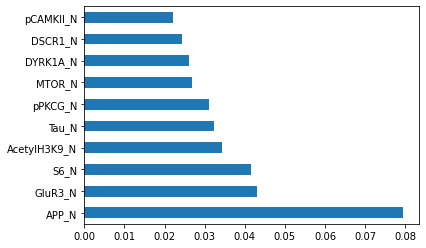

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
FI = ExtraTreesClassifier()    # This extracts 10 best features
FI.fit(X_train,Y_trainb)

f_imp = pd.Series(FI.feature_importances_, index=X_train.columns)
features = f_imp.nlargest(10)
features.plot(kind='barh')
plt.show()

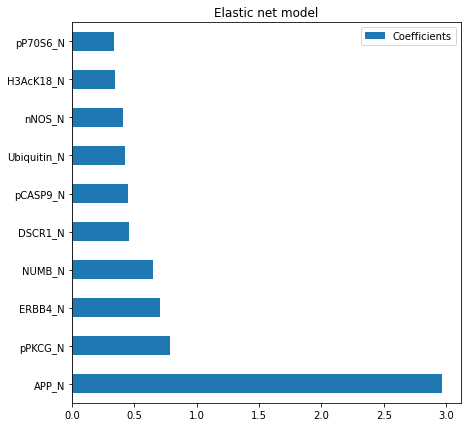

In [109]:
# For Logistic Regression
coefs = pd.DataFrame(regr_L.coef_[0],columns=['Coefficients'],index=X_train.columns)
coefs = coefs.nlargest(10,'Coefficients')
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Elastic net model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

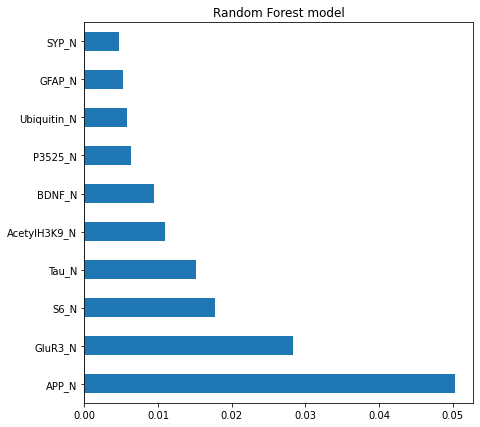

In [110]:
# For Random Forest based on feature permutation
from sklearn.inspection import permutation_importance
result = permutation_importance(rfc, X_te, y_teb, n_repeats=10, random_state=42, n_jobs=2)
rfc_imp = pd.Series(result.importances_mean, index=X_train.columns)
rfc_imp = rfc_imp.nlargest(10)
rfc_imp.plot(kind='barh', figsize=(9, 7))
plt.title('Random Forest model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

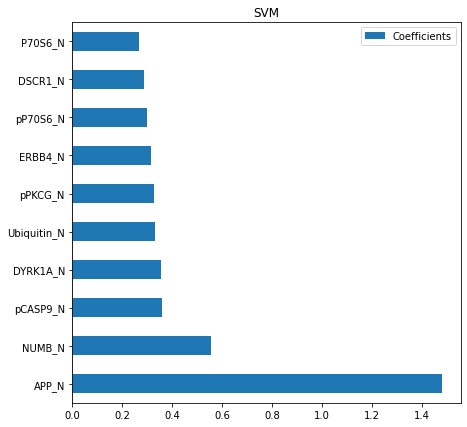

In [111]:
# For SVM
coefsvm = pd.DataFrame(clf.coef_[0],columns=['Coefficients'],index=X_train.columns)
coefsvm = coefsvm.nlargest(10,'Coefficients')
coefsvm.plot(kind='barh', figsize=(9, 7))
plt.title('SVM')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Observation:

In the above bar graphs, the 10 most important features for each model have been displayed. It can be observed that these features are different for each model same as seen in the binary classification case. Thus, the same proteins are not important for each model.

# Recursive feature elimination

Feature elimination is usually done to see if eliminating few other features from the given sample can increase the accuracy

In [112]:
# For SVM

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


estimator = SVR(kernel="linear")
model=SVR()
selector_svm = RFECV(estimator, step=1, cv=5)
selector_svm = selector_svm.fit(X_tr, y_trb)
pipeline = Pipeline(steps=[('s',selector_svm),('m',model)])
selector_svm.support_


array([False,  True, False,  True,  True,  True, False,  True, False,
        True, False, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True])

In [113]:
# For random forest

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

selector_rfc = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',selector_rfc),('m',model)])

# evaluate model

n_scores = cross_val_score(pipeline, X_tr, y_trb, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
print('Accuracy score: '+ str(n_scores.mean()))



Accuracy score: 0.8476125095347063


In [114]:
# Logistic regression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

selector_lr = RFE(estimator=LogisticRegressionCV(), n_features_to_select=5)
model = LogisticRegressionCV()
pipeline = Pipeline(steps=[('s',selector_lr),('m',model)])

# evaluate model
n_scores = cross_val_score(pipeline, X_tr, y_trb, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
print('Accuracy score: '+ str(n_scores.mean()))


Accuracy score: 0.8949504195270785


Observation:

Comparing the accuracy of all models (SVM, elastic net, logistic regression and random forest classification) between the original model and feature eliminated model, we can see that feature elimination actually decreases the accuracy. This means that for this problem, feature elimination is not desirable and it actually decreases the accuracy. This again means that all features considered are important for prediction.

# Multi-class classification

In multi-class classification, for the given problem, we have four different classes. Based on the given input features, we have to predict which one of the four classes does the features map too

In [115]:
le_trainm = preprocessing.LabelEncoder()
le_trainm.fit(Y_train.iloc[:,-1])
Y_trainm = le_trainm.transform(Y_train.iloc[:,-1])
# print(Y_trainm)

le_testm = preprocessing.LabelEncoder()
le_testm.fit(Y_test.iloc[:,-1])
Y_testm =le_testm.transform(Y_test.iloc[:,-1])

In [116]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_trm, y_tem = train_test_split(X_train, Y_trainm, random_state=2)

## Neural networks

In [117]:
# Neural Networks
from sklearn.neural_network import MLPClassifier
clNm = MLPClassifier(solver='lbfgs', alpha=1e-5,max_iter=1000, activation='relu', hidden_layer_sizes=(5, 2), random_state=1)
clNm.out_activation_ = 'softmax'
clNm.fit(X_tr, y_trm)
scores_NN_acc = cross_val_score(clNm, X_te, y_tem, cv=5,scoring='accuracy')
print('Accuracy score: '+ str(score_NN_acc.mean()))

Accuracy score: 0.9372469635627529


## Logistic regression - elastic net


In [118]:
# evaluate multinomial logistic regression model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# define the multinomial logistic regression model
model_lr = LogisticRegression(multi_class='multinomial',max_iter=1000, solver='saga',penalty='elasticnet',C=0.8, l1_ratio=0.1, random_state=1)
model_lr.fit(X_tr,y_trm)
# define the model evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=5, random_state=1)
# evaluate the model and collect the scores
score_lr = cross_val_score(model_lr, X_te, y_tem, scoring='accuracy', cv=5)
# report the model performance
#print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
print('Accuracy score: '+ str(score_lr.mean()))


Accuracy score: 0.9421052631578947


Observation:

The hyperparameter C was tuned to set the required penalty weight to fit the model perfectly

## Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.externals import joblib
# Fitting Random Forest Classification to the Training set
model_rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = None,max_depth=None, )
model_rfc.fit(X_tr, y_trm)

score_rfc = cross_val_score(model_rfc, X_te, y_tem, scoring='accuracy', cv=5)
# report the model performance
#print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
print('Accuracy score: '+ str(score_rfc.mean()))

Accuracy score: 0.868960863697706


## SVM

In [120]:
import sklearn.model_selection as model_selection
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


poly = svm.SVC(kernel='poly', degree=1, C=1)
poly.fit(X_tr, y_trm)
model_svm = svm.SVC()
score_poly = cross_val_score(model_svm, X_te, y_tem, scoring='accuracy', cv=5)
print('Accuracy score of polynomial model: '+ str(score_poly.mean()))

Accuracy score of polynomial model: 0.9110661268556006


Observation

Like binary classification, multi-class classification also can be made using four different models like SVM, Random forest, elastic net and logistic regression. Accuracy score of each model in predicting the validation data-set is displayed. We can see all models have a good range of accuracy aroud 0.9 to 0.95

# Feature importance

Importance of features and their contribution in predicting the classes is demonstrated for different classification models

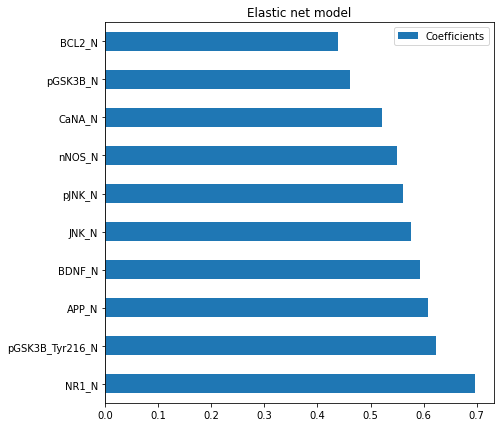

In [121]:
# For Logistic Regression
coefs = pd.DataFrame(model_lr.coef_[0],columns=['Coefficients'],index=X_train.columns)
coefs = coefs.nlargest(10,'Coefficients')
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Elastic net model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

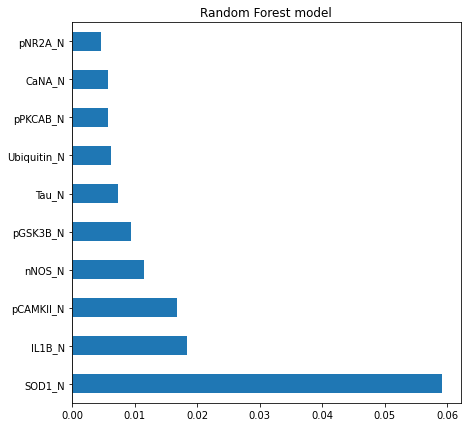

In [122]:
# For Random Forest based on feature permutation
from sklearn.inspection import permutation_importance
result = permutation_importance(model_rfc, X_te, y_tem, n_repeats=10, random_state=42, n_jobs=2)
rfc_imp = pd.Series(result.importances_mean, index=X_train.columns)
rfc_imp = rfc_imp.nlargest(10)
rfc_imp.plot(kind='barh', figsize=(9, 7))
plt.title('Random Forest model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Observation

In the above bar graphs, the 10 most important features for each model have been displayed. It can be observed that these features are different for each model same as seen in the binary classification case. Thus, the same proteins are not important for each model.

# Recursive feature elimination


Feature elimination is usually done to see if eliminating few other features from the given sample can increase the accuracy

In [123]:
# For SVM

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


estimator = SVR(kernel="linear")
model=SVR()

selector_svm = RFECV(estimator,step=1, cv=5)
selector_svm = selector_svm.fit(X_tr, y_trm)
pipeline = Pipeline(steps=[('s',selector_svm),('m',model)])
selector_svm.support_

array([False,  True,  True, False, False,  True, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False])

In [124]:
# For random forest

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

selector_rfc = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',selector_rfc),('m',model)])

# evaluate model

n_scores = cross_val_score(pipeline, X_tr, y_trm, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
print('Accuracy score: '+ str(n_scores.mean()))



Accuracy score: 0.8300381388253243


In [125]:
# Logistic regression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

selector_lr = RFE(estimator=LogisticRegressionCV(), n_features_to_select=5)
model = LogisticRegressionCV()
pipeline = Pipeline(steps=[('s',selector_lr),('m',model)])

# evaluate model
n_scores = cross_val_score(pipeline, X_tr, y_trm, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
print('Accuracy score: '+ str(n_scores.mean()))


Accuracy score: 0.8126315789473685


Observation:

Comparing the accuracy of all models (SVM, elastic net, logistic regression and random forest classification) between the original model and feature eliminated model, we can see that feature elimination actually decreases the accuracy. This means that for this problem, feature elimination is not desirable and it actually decreases the accuracy. This again means that all features considered are important for prediction.

# Testing

Having done all classification model building tasks, in this section we will use our models obtained to predict the test data given. Also we will see how good the model works on a new dataset for which the model was not actually trained by using the accuracy score.

In [126]:
# Let us test the best models for binary and multi-class classification with the test-dataset
# Binary classification - Logistic Regression/Elastic Net
score_lr = cross_val_score(regr_L, X_test, Y_testb, scoring='accuracy', cv=5)
print('Score: '+ str(score_lr.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Score: 0.9511111111111111


In [127]:
# Binary classification - Neural Network
score_NN_test = cross_val_score(clN, X_test, Y_testb, cv=5,scoring='accuracy')
print('Score: '+ str(score_NN_test.mean()))

Score: 0.888888888888889


In [128]:
# Multi-class classification - Neural Network
score_NNm_test = cross_val_score(clNm, X_test, Y_testm, cv=5,scoring='accuracy')
print('Score: '+ str(score_NNm_test.mean()))
X_test.shape

Score: 0.8755555555555556


(225, 55)

In [129]:
# Multi-class classification - Logistic Regression/Elastic Net
score_EN = model_lr.score(X_test, Y_testm)
score_lr = cross_val_score(model_lr, X_test, Y_testm, scoring='accuracy', cv=5)
print(score_lr.mean())

0.9911111111111112


Observation:

We can see that our developed model gives good accuracy on new set of data values. Hence we have successfully developed a model which can pr

# References

References:
1. https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python 
2. https://satishgunjal.com/kfold/#25 
3. https://stats.stackexchange.com/questions/243588/how-to-apply-softmax-as-activation-function-in-multi-layer-perceptron-in-scikit 
4. https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f
5. https://www.hindawi.com/journals/aaa/2014/569501/
6. https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
